# Exploring Employee Exit Surveys
#### A DataQuest Guided Project

This project is an analysis of exit surveys completed by former employees of the Department of Education, Training and Employment ([DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)) and the Technical and Further Education ([TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)) institute in Queensland Australia.  Our goal is to answer the following questions.

> Are short term employees of the institutes resigning due to some kind of disatifaction?  Longer term employees?  Younger employees?  Older?

We will be combining both studies, and will have to do some cleaning to enable this.  First, let us get our datasets set up in `pandas`, and explore the variables that we are working with.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline


In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Data Cleaning - Columns

From `dete_survey.head()`, we can see that some rows in the date related columns have 'Not Stated' entries:  we should change these to `NaN`.

In [5]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

We should also drop some of the superfluous columns, since we won't need to use many of them for this project.   We want to keep columns that pertain to time of service, age of employee and reason for separation.   There are other interesting columns, but they are outside of our current scope.  We could probably drop even more columns, and may do so in the future.

In [6]:
dete = dete_survey.drop(dete_survey.columns[28:48], axis=1)
tafe = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Next, let's move on to column names.  First, let's make them all lowercase, remove all punctuation and replace spaces with underscores.

In [7]:
dete.columns = (dete.columns.str.lower()
                .str.replace('[()]', '').str.replace(r'/', '_').str.replace('.', '')
                .str.replace('-', '').str.replace(' ', '_'))
tafe.columns = (tafe.columns.str.lower()
                .str.replace('[()]', '').str.replace(r'/', '_').str.replace('.', '')
                .str.replace('-', '').str.replace(' ', '_'))

Now let's compare the results.

We will need to manually change a few of these, to make them line up and/or conform to our_standard.  We will drop the final column in TAFE as well.  The specific changes that follow are pretty much self-explanatory

In [8]:
dete_name_changes = {'separationtype' : 'separation_type', 'workload' : 'work_load',
                    'dissatisfaction_with_the_department':'dept_dissatisfaction',
                    'dete_start_date':'start_date'}

In [9]:
tafe_name_changes = {'record_id' : 'id', 'workarea' : 'work_area', 'cessation_year' : 'cease_date',
                     'reason_for_ceasing_employment' : 'separation_type', 'employment_type_employment_type':'employment_type',
                     'lengthofserviceoverall_overall_length_of_service_at_institute_in_years': 'institute_service',
                     'gender_what_is_your_gender?':'gender', 'currentage_current_age':'age',
                     'classification_classification' : 'position',
                     'contributing_factors_career_move__public_sector_':'cf_career_move_public',
                     'contributing_factors_career_move__private_sector_':'cf_career_move_private',
                     'contributing_factors_career_move__selfemployment':'cf_career_move_selfemployeed',
                     }
                     
dete.rename(dete_name_changes, axis=1, inplace=True)
tafe.rename(tafe_name_changes, axis=1, inplace=True)
tafe = tafe.drop(['lengthofservicecurrent_length_of_service_at_current_workplace_in_years',
                ], axis=1)
dete = dete.drop(['role_start_date'], axis=1) 

# replace all 'contributing factor names with 'cf'
tafe.columns = tafe.columns.str.replace('contributing_factors','cf')

In [10]:
for col1, col2 in zip(dete.columns, tafe.columns):
    print("{}".format(col1).ljust(30), "    ", "{}".format(col2).ljust(15))

id                                  id             
separation_type                     institute      
cease_date                          work_area      
start_date                          cease_date     
position                            separation_type
classification                      cf_career_move_public
region                              cf_career_move_private
business_unit                       cf_career_move_selfemployeed
employment_status                   cf_ill_health  
career_move_to_public_sector        cf_maternity_family
career_move_to_private_sector       cf_dissatisfaction
interpersonal_conflicts             cf_job_dissatisfaction
job_dissatisfaction                 cf_interpersonal_conflict
dept_dissatisfaction                cf_study       
physical_work_environment           cf_travel      
lack_of_recognition                 cf_other       
lack_of_job_security                cf_none        
work_location                       gender         
employment_con

## Data Cleaning - Resignations Only

This is an improvement, but recall that our concern here is to determine whether employees (according to several different subgroupings) resigned from their employer due to some disatisfaction.  Let us consider the unique values in the `separation_type` columns.

In [11]:
dete['separation_type'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

In [12]:
tafe['separation_type'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separation_type, dtype: int64

We will only include survey respondents who separated by some form of resignation:  and retirement is not to be counted among resignations.  And we will need to pass over that NaN explicitly while indexing.

In [13]:
dete_resigned = dete[dete['separation_type'].str.startswith('Resignation')].copy()
tafe_resigned = tafe[(tafe['separation_type'].str.startswith('Resignation'))
                    & (~ tafe['separation_type'].isnull())].copy()

In [14]:
dete_resigned['separation_type'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separation_type, dtype: int64

In [15]:
tafe_resigned['separation_type'].value_counts()

Resignation    340
Name: separation_type, dtype: int64

## Data Cleaning - Dates

We ought to verify that all of the date-related entries make sense.  It looks like they all have 'date' in their name.

Let we will clean up `dete_resigned['cease_date']`.  We will simplify everything down to years, since portions of years won't make a significant difference in our analysis.  It looks like all of the years are four digits, which is convenient.  We need simply to match for these year strings.

In [16]:
dete_resigned['cease_date']

3      05/2012
5      05/2012
8      07/2012
9         2012
11        2012
12        2012
14        2012
16        2012
20        2012
21        2012
22        2012
23        2012
25        2012
27        2012
33        2012
34        2012
37        2012
39        2012
40        2012
41        2012
42        2012
43        2012
48        2012
50        2012
51        2012
55        2012
57        2012
61        2012
69        2012
71        2012
        ...   
747    01/2014
751    12/2013
752    11/2013
753    11/2013
755    12/2013
762    07/2006
766    01/2014
769    11/2013
770        NaN
771    01/2014
774        NaN
784    10/2013
786    01/2014
788        NaN
789    01/2014
790    01/2014
791        NaN
794    11/2013
797        NaN
798        NaN
802    12/2013
803    01/2014
804    01/2014
806    12/2013
807    12/2013
808    12/2013
815    01/2014
816    01/2014
819    01/2014
821    12/2013
Name: cease_date, Length: 311, dtype: object

In [17]:
# Extract the years and convert them to a float type
dete_resigned['cease_date'] = dete_resigned['cease_date'].str.split('/').str[-1]
dete_resigned['cease_date'] = dete_resigned['cease_date'].astype("float")


In [18]:
dete_resigned['start_date'].value_counts(dropna=False).sort_values()

 1977.0     1
 1963.0     1
 1972.0     1
 1984.0     1
 1971.0     1
 1973.0     1
 1987.0     1
 1982.0     1
 1975.0     1
 1974.0     2
 1983.0     2
 1976.0     2
 1985.0     3
 1986.0     3
 2001.0     3
 1991.0     4
 1988.0     4
 1995.0     4
 1989.0     4
 1993.0     5
 1997.0     5
 1990.0     5
 1980.0     5
 2003.0     6
 1992.0     6
 1996.0     6
 1994.0     6
 2002.0     6
 1998.0     6
 1999.0     8
 2000.0     9
 2013.0    10
 2006.0    13
 2009.0    13
 2004.0    14
 2005.0    15
 2010.0    17
 2012.0    21
 2007.0    21
 2008.0    22
 2011.0    24
NaN        28
Name: start_date, dtype: int64

Let's look closer at the rows with NaN values in them, to decide what we should do about them.


In [19]:
dete_resigned[dete_resigned['cease_date'].isnull()]

,id,separation_type,cease_date,start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,...,work_load,none_of_the_above,health_&_safety,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
683,685,Resignation-Other employer,NaN,2011.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,...,False,False,N,Male,21-25,NaN,NaN,NaN,NaN,NaN
694,696,Resignation-Other reasons,NaN,2012.0,Teacher Aide,NaN,Metropolitan,NaN,Casual,False,...,False,False,NaN,Female,46-50,NaN,NaN,NaN,NaN,NaN
704,706,Resignation-Other reasons,NaN,2006.0,Teacher Aide,NaN,Darling Downs South West,NaN,Permanent Full-time,False,...,False,False,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
709,711,Resignation-Other employer,NaN,NaN,Teacher,Primary,Central Office,Education Queensland,Permanent Full-time,False,...,True,False,A,Female,51-55,NaN,NaN,NaN,NaN,NaN
724,726,Resignation-Other reasons,NaN,1984.0,Teacher,Primary,Darling Downs South West,NaN,Permanent Full-time,False,...,False,False,N,Female,46-50,NaN,NaN,NaN,NaN,NaN
770,772,Resignation-Other reasons,NaN,1987.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,False,...,False,True,A,Female,61 or older,NaN,NaN,NaN,NaN,NaN
774,776,Resignation-Other employer,NaN,2005.0,Teacher Aide,NaN,Central Queensland,NaN,Permanent Part-time,False,...,False,True,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
788,790,Resignation-Other employer,NaN,1990.0,Teacher,Secondary,Metropolitan,NaN,Permanent Full-time,False,...,False,False,D,Female,41-45,NaN,NaN,NaN,NaN,NaN
791,793,Resignation-Other reasons,NaN,2007.0,Public Servant,A01-A04,Metropolitan,NaN,Permanent Part-time,False,...,False,False,A,Female,46-50,NaN,NaN,NaN,NaN,NaN
797,799,Resignation-Move overseas/interstate,NaN,2000.0,Public Servant,A01-A04,South East,NaN,Permanent Part-time,False,...,False,False,A,Female,36-40,NaN,NaN,NaN,NaN,NaN


In [20]:
dete_resigned.loc[dete_resigned['cease_date'].isnull(), 'career_move_to_public_sector':'work_life_balance']

,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dept_dissatisfaction,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity_family,relocation,study_travel,ill_health,traumatic_incident,work_life_balance
683,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
694,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
704,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
709,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
724,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
770,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
774,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
788,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
791,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False


If we remove these rows, we will skew our results slightly towards disatisfaction among resignees, since all but two of these rows seem to _not_ be reporting dissatisfaction (the exceptions being the two respondents who reported lack of recognition).  So, let us keep them in.  We will replace the NaN's with the mean cease date.  And we might as well do the same with the TAFE survey.

In [21]:
dete_resigned['cease_date'].value_counts(dropna=False)

 2013.0    146
 2012.0    129
 2014.0     22
NaN         11
 2010.0      2
 2006.0      1
Name: cease_date, dtype: int64

In [22]:
mean_cease = dete_resigned['cease_date'].astype(float).mean().round()
dete_resigned['cease_date'].fillna(mean_cease, inplace=True)
dete_resigned['cease_date'].value_counts(dropna=False)

2013.0    157
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [23]:
mean_cease = dete_resigned['start_date'].astype(float).mean().round()
dete_resigned['start_date'].fillna(mean_cease, inplace=True)
dete_resigned['start_date'].value_counts(dropna=False)

2002.0    34
2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
1996.0     6
1992.0     6
1998.0     6
2003.0     6
1990.0     5
1993.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1987.0     1
1975.0     1
1977.0     1
1973.0     1
1982.0     1
1963.0     1
Name: start_date, dtype: int64

In [24]:
mean_cease = tafe_resigned['cease_date'].astype(float).mean().round()
tafe_resigned['cease_date'].fillna(mean_cease, inplace=True)
tafe_resigned['cease_date'].value_counts(dropna=False)

2011.0    121
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

And with that, I would say that those columns are clean.  However, we still cannot compare our two surveys, since the TAFE survey does not tell us the `start_date`, but rather `institute service`.

Our plan here will be to make a new category in `dete_resigned` called `institute_service`, letting it be equal to the difference between `cease_date` and `start_date`.  Then we will have to clean up the corresponding column in TATE by taking the arverage of ranges, changing 'Less than 1 year' entries to 0.5, 'More than 20 years' to 20, and  setting NaN equal to the mean service time.

In [25]:
dete_resigned['institute_service'] = (dete_resigned['cease_date']
                                      - dete_resigned['start_date'])

mean_service = dete_resigned['institute_service'].mean()
mean_service

10.553054662379422

In [26]:
tafe_resigned['institute_service'] \
   = (tafe_resigned['institute_service']
       .str.replace('Less than 1 year', '0-0.5')
       .str.replace('More than 20 years', '0-20')
       .fillna('0-10.5')
       .str.split('-'))
    
tafe_resigned['institute_service'] = (tafe_resigned['institute_service'].str.get(1).astype(float)
                                      - tafe_resigned['institute_service'].str.get(0).astype(float))

In [27]:
tafe_resigned['institute_service'].value_counts(dropna=False).sort_index()

0.5      73
1.0     160
3.0      21
9.0      26
10.5     50
20.0     10
Name: institute_service, dtype: int64

Well, does this look reasonable?  Let's check the mean.

In [28]:
tafe_resigned['institute_service'].mean()

3.583823529411765

Hmm, that is much lower than the mean service time from DETE.  We had better adjust the values that were NaN just a moment ago.  So, what is the mean of the _other_ values in `tafe_resigned['institute_service']`, the one's that were not NaN just moment ago.

In [29]:
tafe_resigned['institute_service'][tafe_resigned['institute_service'] != 10.5].mean()

2.3913793103448278

Ah, well I suppose we should have done something like that in the first place.  Live and (eventually) learn.  So, 

In [30]:
tafe_resigned.loc[tafe_resigned['institute_service'] == 10.5, 'institute_service']= 2.39
tafe_resigned['institute_service'].mean()


2.3911764705882352

That's better.

### Data Cleaning - Dissatisfaction

With the time-related data cleaned, we can finally turn our attention to employee satisfaction.
We will categorize workers as dissatisfied if they fall in one of the following categories:

1. TAFE:
    * `cf_dissatisfaction`
    * `cf_job_dissatisfaction`
    
2.  DETE:
    * `job_dissatisfaction`
    * `dissatisfaction`
    * `physical_work_environment`
    * `lack_of_recognition`
    * `lack_of_job_security`
    * `work_location`
    * `employment_conditions`
    * `work_life_balance`
    * `work_load`.

In [31]:
dissatisfied_dete = ['job_dissatisfaction','dept_dissatisfaction','physical_work_environment',
            'lack_of_recognition','lack_of_job_security','work_location',
            'employment_conditions','work_life_balance','work_load']

dissatisfied_tafe = ['cf_dissatisfaction', 'cf_job_dissatisfaction']

Our objective is to create a new `dissatisfied` column in each of our dataframes, the values of which will be determined by the values of the corresponding dissatisfactory columns:  if any of them return `True` for dissatisfaction, so to will the corresponding entry in `df['dissatisfied']`. However, data from TAFE is acting up again:

In [32]:
# Before cleaning 1
tafe_resigned['cf_dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: cf_dissatisfaction, dtype: int64

In [33]:
# Before cleaning 2
tafe_resigned['cf_job_dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: cf_job_dissatisfaction, dtype: int64

We need to translate these into `True` and `False`.  We will transform all entries of '-' into `False`, `NaN` into `np.nan` and everything else into `True`.

In [34]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    return True

In [35]:
tafe_resigned[['cf_job_dissatisfaction','cf_dissatisfaction']] \
   = tafe_resigned[['cf_job_dissatisfaction',
                    'cf_dissatisfaction']].applymap(update_vals, )

# After cleaning 1
tafe_resigned['cf_dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: cf_dissatisfaction, dtype: int64

In [36]:
# After cleaning 2
tafe_resigned['cf_job_dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: cf_job_dissatisfaction, dtype: int64

The values for the DETE survey seem workable.

In [37]:
dete_resigned[dissatisfied_dete].apply(pd.Series.value_counts)

,job_dissatisfaction,dept_dissatisfaction,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,work_load
False,270,282,305,278,297,293,288,243,284
True,41,29,6,33,14,18,23,68,27


Now to create and compute values for our `dissatisfied` columns.

In [38]:
dete_resigned['dissatisfied'] \
  = dete_resigned[dissatisfied_dete].any(axis=1, skipna=True)
    
dete_resigned['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [39]:
tafe_resigned['dissatisfied'] \
  = tafe_resigned[dissatisfied_tafe].any(axis=1, skipna=True)
    
tafe_resigned['dissatisfied'].value_counts(dropna=False)

False    249
True      91
Name: dissatisfied, dtype: int64

And with that it appears that our cleaning is done.  Let us save our results as a new datasets.

In [40]:
dete_clean = dete_resigned.copy()
tafe_clean = tafe_resigned.copy()

### Combining the Datasets

To distinguish which survey each record originally comes from, we will create a new column in each that notes the survey of origin.

In [41]:
dete_clean['institute'] = 'DETE'
tafe_clean['institute'] = 'TAFE'
combined_full = pd.concat([dete_clean, tafe_clean])
combined_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 52 columns):
aboriginal                       7 non-null object
age                              596 non-null object
business_unit                    32 non-null object
career_move_to_private_sector    311 non-null object
career_move_to_public_sector     311 non-null object
cease_date                       651 non-null float64
cf_career_move_private           332 non-null object
cf_career_move_public            332 non-null object
cf_career_move_selfemployeed     332 non-null object
cf_dissatisfaction               332 non-null object
cf_ill_health                    332 non-null object
cf_interpersonal_conflict        332 non-null object
cf_job_dissatisfaction           332 non-null object
cf_maternity_family              332 non-null object
cf_none                          332 non-null object
cf_other                         332 non-null object
cf_study                         332 non-null obj

At this point, we are done with the individual dissatisfaction related columns, and we can safely remove most of the rest as well.

In [42]:
combined = combined_full.dropna(axis=1, thresh=500).copy()
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 9 columns):
age                  596 non-null object
cease_date           651 non-null float64
dissatisfied         651 non-null bool
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    651 non-null float64
position             598 non-null object
separation_type      651 non-null object
dtypes: bool(1), float64(3), object(5)
memory usage: 46.4+ KB


### Analysis of Dissatisfaction

We'd best recall our initial queries:

> Are short term employees of the institutes resigning due to some kind of disatifaction?  Longer term employees?  Younger employees?  Older?

We are finally in a position to begin answering them.  The categories involved are rather squishy, so let us define it a bit more precisely.  We will set up four subcategories for both length of service and age.

#### Length of Service 

1.  Less than 3 years
2.  3 to 7 years
3.  7 to 10 years
4.  More than 10 years

#### Age

1.  29 or younger
2.  30 - 45
3.  45 - 60
4.  60 and older 



Let us first consider length of service.  Here is a function that maps length of service to our four categories.

In [43]:
def map_service(t):
    """Maps length of service t to one of our four categories."""
    tests = [t<3, 3<=t<7, 7<=t<10, 10<=t]
    return tests.index(True) + 1

In [44]:
something = combined.loc[:, 'institute_service'].apply(map_service)
combined.loc[:, 'service_cat'] = something.copy()
combined

,age,cease_date,dissatisfied,gender,id,institute,institute_service,position,separation_type,service_cat
3,36-40,2012.0,False,Female,4.000000e+00,DETE,7.00,Teacher,Resignation-Other reasons,3
5,41-45,2012.0,True,Female,6.000000e+00,DETE,18.00,Guidance Officer,Resignation-Other reasons,4
8,31-35,2012.0,False,Female,9.000000e+00,DETE,3.00,Teacher,Resignation-Other reasons,2
9,46-50,2012.0,True,Female,1.000000e+01,DETE,15.00,Teacher Aide,Resignation-Other employer,4
11,31-35,2012.0,False,Male,1.200000e+01,DETE,3.00,Teacher,Resignation-Move overseas/interstate,2
12,36-40,2012.0,False,Female,1.300000e+01,DETE,14.00,Teacher,Resignation-Other reasons,4
14,31-35,2012.0,True,Male,1.500000e+01,DETE,5.00,Teacher,Resignation-Other employer,2
16,61 or older,2012.0,True,Male,1.700000e+01,DETE,10.00,Teacher Aide,Resignation-Other reasons,4
20,56-60,2012.0,False,Male,2.100000e+01,DETE,30.00,Teacher,Resignation-Other employer,4
21,51-55,2012.0,False,Female,2.200000e+01,DETE,32.00,Cleaner,Resignation-Other reasons,4


An analogous mapper for ages would be easy to write.  However, the `age` column would require _more_ cleaning, and I am eager to finish this project and move on to other pastures.  So we will have to be satisfied with only considering length of service.  We now use `df.pivot_table` to compute percentages of dissatisfied resignees per service category, and plot the results.

In [46]:
combined['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [59]:
dis_pct = combined.pivot_table(index='service_cat', values='dissatisfied')

,dissatisfied
service_cat,
1,0.281525
2,0.438776
3,0.460317
4,0.483221


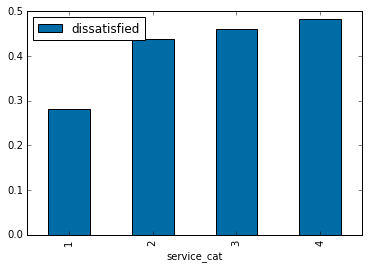

In [69]:
dis_pct.plot(kind='bar', color=(0/252,107/252,164/252))
plt.show()

It seems that dissatisfaction of resignees grows with length of service.  This makes a certain amount of sense.   Those who have already worked at a job for some time are perhaps less likely to leave that job unless they become dissatisfied.  Those who have not been on the job for long may be more likely to leave for a different position without any real dissatisfaction.  Some people just like change more than others.

In [ ]:
# TODO

Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?

Instead of analyzing the survey results together, analyze each survey separately. 

Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

Format your project using Dataquest's project style guide.